Instalação da biblioteca Paho MQTT


In [1]:
!pip install paho-mqtt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62117 sha256=fdc6db2c5023f551931f4bfbcfc16f17773e6cb69a971f202790b56cd880ac1c
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt


Leitura de dados de um tópico do broker MQTT


In [ ]:
import paho.mqtt.client as mqtt

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("/TEF/lamp200/attrs/p")

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect("46.17.108.113", 1883, 60)

# Blocking call that processes network traffic, dispatches callbacks and
# handles reconnecting.
# Other loop*() functions are available that give a threaded interface and a
# manual interface.
client.loop_forever()

/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'392. 7'
/TEF/lamp200/attrs/p b'424. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lamp200/attrs/p b'714. 7'
/TEF/lam

Escrita de dados de um tópico do broker MQTT (ON)

In [ ]:
import paho.mqtt.client as mqtt

client.connect("46.17.108.113", 1883, 60)
client.publish("/TEF/lamp110/cmd","lamp110@on|")

Escrita de dados de um tópico do broker MQTT (OFF)

In [ ]:
import paho.mqtt.client as mqtt

client.connect("46.17.108.113", 1883, 60)
client.publish("/TEF/lamp110/cmd","lamp110@off|")

Informações do Health Check

In [ ]:
import requests

r = requests.get('http://46.17.108.113:1026/version', auth=('user', 'pass'))
r.status_code
r.json()

{'orion': {'version': '3.10.1',
  'uptime': '10 d, 15 h, 41 m, 52 s',
  'git_hash': '9a80e06abe7f690901cf1586377acec02d40e303',
  'compile_time': 'Mon Jun 12 16:55:20 UTC 2023',
  'compiled_by': 'root',
  'compiled_in': 'buildkitsandbox',
  'release_date': 'Mon Jun 12 16:55:20 UTC 2023',
  'machine': 'x86_64',
  'doc': 'https://fiware-orion.rtfd.io/en/3.10.1/',
  'libversions': {'boost': '1_74',
   'libcurl': 'libcurl/7.74.0 OpenSSL/1.1.1n zlib/1.2.12 brotli/1.0.9 libidn2/2.3.0 libpsl/0.21.0 (+libidn2/2.3.0) libssh2/1.9.0 nghttp2/1.43.0 librtmp/2.3',
   'libmosquitto': '2.0.15',
   'libmicrohttpd': '0.9.76',
   'openssl': '1.1',
   'rapidjson': '1.1.0',
   'mongoc': '1.23.1',
   'bson': '1.23.1'}}}

Gerar um gráfico do histórico de dados

Digite um valor para lastN (entre 1 e 100): 20


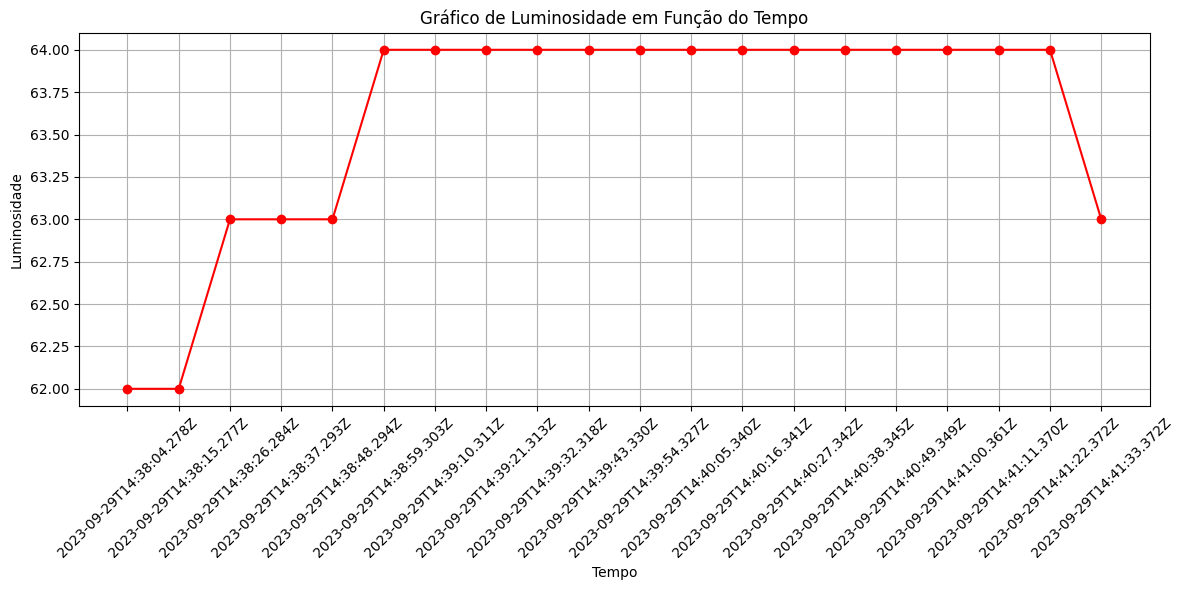

In [ ]:
import requests
import matplotlib.pyplot as plt

# Função para obter os dados de luminosidade a partir da API
def obter_dados_luminosidade(lastN):
    url = f"http://46.17.108.113:8666/STH/v1/contextEntities/type/Lamp/id/urn:ngsi-ld:Lamp:001/attributes/luminosity?lastN={lastN}"

    headers = {
        'fiware-service': 'smart',
        'fiware-servicepath': '/'
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        luminosity_data = data['contextResponses'][0]['contextElement']['attributes'][0]['values']
        return luminosity_data
    else:
        print(f"Erro ao obter dados: {response.status_code}")
        return []

# Função para criar e exibir o gráfico
def plotar_grafico(luminosity_data):
    if not luminosity_data:
        print("Nenhum dado disponível para plotar.")
        return

    luminosidade = [entry['attrValue'] for entry in luminosity_data]
    tempos = [entry['recvTime'] for entry in luminosity_data]

    plt.figure(figsize=(12, 6))
    plt.plot(tempos, luminosidade, marker='o', linestyle='-', color='r')
    plt.title('Gráfico de Luminosidade em Função do Tempo')
    plt.xlabel('Tempo')
    plt.ylabel('Luminosidade')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Solicitar ao usuário um valor "lastN" entre 1 e 100
while True:
    try:
        lastN = int(input("Digite um valor para lastN (entre 1 e 100): "))
        if 1 <= lastN <= 100:
            break
        else:
            print("O valor deve estar entre 1 e 100. Tente novamente.")
    except ValueError:
        print("Por favor, digite um número válido.")

# Obter os dados de luminosidade e plotar o gráfico
luminosity_data = obter_dados_luminosidade(lastN)
plotar_grafico(luminosity_data)
